##Group Members:
######Amit Hasan Sadhin
######Rasel

# Supervised Learning

##### Dataset: Palmerpenguins: Palmer Archipelago (Antarctica) Penguin Data


In [ ]:
# Importing Pandas library
import pandas as pd
# Importing Numpy library
import numpy as np
# Importing matplotlib.pyplot for drawing graph
import matplotlib.pyplot as plt
# For plotting the dataset in seaborn
import seaborn as sns
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
# For feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
# For splitting the dataset in test and train data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
# for plotting the scatter plot
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# insert only .csv file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving penguins.csv to penguins.csv
User uploaded file "penguins.csv" with length 50914 bytes


In [ ]:
import io
penguin_data_frame = pd.read_csv(io.BytesIO(uploaded['penguins.csv']))

In [ ]:
# Checking if the dataframe is stored correctly
penguin_data_frame.head(10)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,11/15/07,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
8,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,11/9/07,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
9,PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,11/9/07,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,No blood sample obtained for sexing.


##Pre-Analytics Data

In [ ]:
# checking the number of columns, column labels, column data types, memory usage,
# range index, and the number of cells in each column (non-null values) in the penguin dataset.
penguin_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [ ]:
# Counting the number of penguins for each species
penguin_data_frame.Species.value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [ ]:
# checking the number of null values each columns have
penguin_data_frame.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [ ]:
# replacing the null values of each columns, of floating values, with the median value
for column_penguin in penguin_data_frame.select_dtypes(include='float', exclude='object'):
  penguin_data_frame.loc[:,column_penguin].fillna(penguin_data_frame.loc[:,column_penguin].median(), axis=0, inplace=True)

In [ ]:
# replacing the null value of the column "sex" with the next row value
penguin_data_frame.Sex.fillna(method ='bfill', inplace = True)
# Making a copy of the dataset for visualization
penguin_data_frame_visualization = penguin_data_frame

In [ ]:
# checking if there is any null values left
penguin_data_frame.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                      0
Delta 15 N (o/oo)        0
Delta 13 C (o/oo)        0
Comments               318
dtype: int64

In [ ]:
# Normalizing the non-numerical labels: "species", "island", "sex" using label encoding
label_encoder = LabelEncoder()
penguin_data_frame['species_label_encoded']= label_encoder.fit_transform(penguin_data_frame['Species'])
penguin_data_frame['island_label_encoded']= label_encoder.fit_transform(penguin_data_frame['Island'])
penguin_data_frame['sex_label_encoded']= label_encoder.fit_transform(penguin_data_frame['Sex'])
penguin_data_frame['bill_length_mm']= label_encoder.fit_transform(penguin_data_frame['Culmen Length (mm)'])
penguin_data_frame['bill_depth_mm']= label_encoder.fit_transform(penguin_data_frame['Culmen Depth (mm)'])
penguin_data_frame['flipper_length_mm']= label_encoder.fit_transform(penguin_data_frame['Flipper Length (mm)'])
penguin_data_frame['body_mass_g']= label_encoder.fit_transform(penguin_data_frame['Body Mass (g)'])

penguin_data_frame.head(10)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),...,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,species_label_encoded,island_label_encoded,sex_label_encoded,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.10,...,8.652405,-25.83352,Not enough blood for isotopes.,0,2,2,42,56,6,31
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.50,...,8.949560,-24.69454,NaN,0,2,1,45,43,11,33
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.30,...,8.368210,-25.33302,NaN,0,2,1,51,49,20,12
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,44.45,...,8.652405,-25.83352,Adult not sampled.,0,2,1,85,42,22,41
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.70,...,8.766510,-25.32426,NaN,0,2,1,22,62,18,19
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.30,...,8.664960,-25.29805,NaN,0,2,2,44,74,15,27
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.90,...,9.187180,-25.21799,Nest never observed with full clutch.,0,2,1,40,47,6,26
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,11/15/07,39.20,...,9.460600,-24.89958,Nest never observed with full clutch.,0,2,2,43,65,20,60
8,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,11/9/07,34.10,...,8.652405,-25.83352,No blood sample obtained.,0,2,1,4,50,18,20
9,PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,11/9/07,42.00,...,9.133620,-25.09368,No blood sample obtained for sexing.,0,2,1,65,71,15,46


In [ ]:
# Outlier dismissal by z score treatment
# Calculating the boundary values:
features = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'species_label_encoded', 'island_label_encoded', 'sex_label_encoded']
for column_penguin in penguin_data_frame[features]:
  print("Highest allowed in {} is: {}".format(column_penguin, penguin_data_frame[column_penguin].mean() + 3 * penguin_data_frame[column_penguin].std()))
  print("Lowest allowed in {} is: {}\n\n".format(column_penguin, penguin_data_frame[column_penguin].mean() - 3 * penguin_data_frame[column_penguin].std()))


Highest allowed in bill_length_mm is: 213.84402573203482
Lowest allowed in bill_length_mm is: -51.105653639011564


Highest allowed in bill_depth_mm is: 99.07541334621646
Lowest allowed in bill_depth_mm is: -18.185878462495538


Highest allowed in flipper_length_mm is: 65.9138718901681
Lowest allowed in flipper_length_mm is: -14.948755611098331


Highest allowed in body_mass_g is: 117.63880159020437
Lowest allowed in body_mass_g is: -29.92949926462297


Highest allowed in species_label_encoded is: 3.598563949890442
Lowest allowed in species_label_encoded is: -1.7613546475648607


Highest allowed in island_label_encoded is: 2.8413728243608265
Lowest allowed in island_label_encoded is: -1.5157914290119896


Highest allowed in sex_label_encoded is: 3.0136375249879097
Lowest allowed in sex_label_encoded is: -0.025265431964653917




In [ ]:
# Finding out the outliers in the penguin dataset
print(penguin_data_frame[(penguin_data_frame['bill_length_mm'] > 60.25637530160835) | (penguin_data_frame['bill_length_mm'] < 27.5936246983917)])
print(penguin_data_frame[(penguin_data_frame['bill_depth_mm'] > 23.0592146778538) | (penguin_data_frame['bill_depth_mm'] < 11.244855089588075)])
print(penguin_data_frame[(penguin_data_frame['flipper_length_mm'] > 242.96392008847835) | (penguin_data_frame['flipper_length_mm'] < 158.82096363245188)])
print(penguin_data_frame[(penguin_data_frame['body_mass_g'] > 6599.961689147138) | (penguin_data_frame['body_mass_g'] < 1801.782496899374)])
print(penguin_data_frame[(penguin_data_frame['species_label_encoded'] > 3.5985639498904427) | (penguin_data_frame['species_label_encoded'] < -1.7613546475648616)])
print(penguin_data_frame[(penguin_data_frame['island_label_encoded'] > 2.841372824360822) | (penguin_data_frame['island_label_encoded'] < -1.5157914290119852)])
print(penguin_data_frame[(penguin_data_frame['sex_label_encoded'] > 2.0021849975165673) | (penguin_data_frame['sex_label_encoded'] < -1.0021849975165673)])
# all of them return as empty dataframe which means that the dataset does not have any outliers

    studyName  Sample Number                              Species  Region  \
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
8     PAL0708              9  Adelie Penguin (Pygoscelis adeliae)  Anvers   
9     PAL0708             10  Adelie Penguin (Pygoscelis adeliae)  Anvers   
14    PAL0708             15  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
339   PAL0910            120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910            121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910            122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910            123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910            124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion  Date Eg

## Exploring Data

In [ ]:
px.bar( data_frame=penguin_data_frame_visualization, y = 'Island',
        facet_row='Species',facet_row_spacing=0.10,
        pattern_shape='Species',
        color='Species',
        color_discrete_map={'Adeile':'rgb(167,98,188)', 'Chinstrap':'rgb(4,115,116)', 'Gentoo':'rgb(251,117,4)'},
        width=1000,height=700 )

In [ ]:
fig = px.pie(penguin_data_frame_visualization, values="species_label_encoded", names = "Sex", title='Percentage of Gender',
             width=600,height=400, color = "Sex",
             color_discrete_map={
                                 'male':'cyan',
                                 'female':'royalblue'})
fig.show()

In [ ]:
fig = px.scatter(data_frame=penguin_data_frame_visualization,
           x = 'bill_length_mm', y = 'body_mass_g',
           color = 'Species',
           color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(34,136,213)', 'Gentoo':'rgb(4,115,116)'},
           symbol='Species',
           symbol_map = {'Adeile':'circle', 'Chinstrap':'triangle-up', 'Gentoo':'square'},
           height= 700
           )
fig.update_traces(marker=dict(size=7))
fig.update_layout(title='flipper length (mm) vs body mass (g)',
                  titlefont = dict( color='black', family='Open Sans'),)

fig.show()

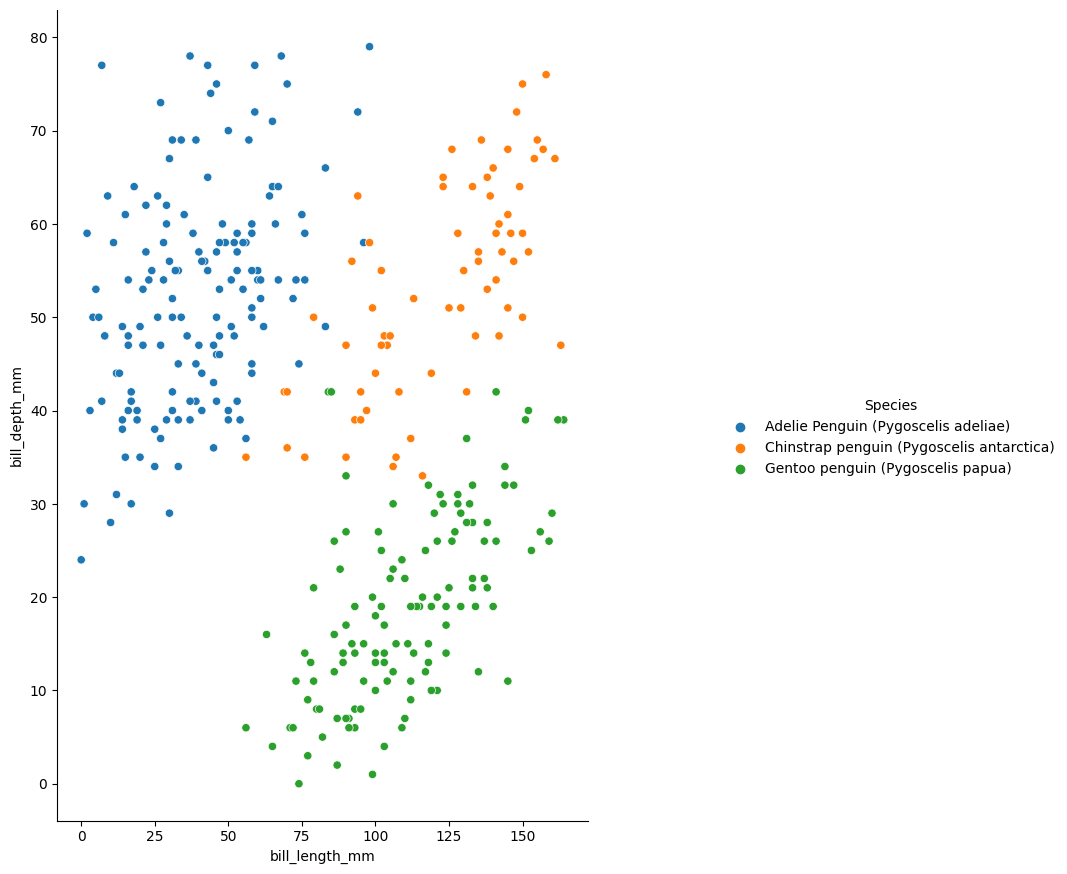

In [ ]:
g = sns.relplot(data=penguin_data_frame_visualization, x='bill_length_mm', y='bill_depth_mm', hue='Species')
g.figure.set_size_inches(11.5, 9.5)
sns.despine()

##Feature Selection
<p>For feature selection, we are using Feature Importance and heatmap of correlation matrix.</p>
Feature importance technique is used to choose the importance features. It basically uses a trained supervised classifier to select features. We can implement this feature selection technique with the help of ExtraTreeClassifier class of scikit-learn Python library.The higher the score, higher is the importance of that attribute.

In [ ]:
# Droping the non-numerical values
penguin_data_frame_copy = penguin_data_frame
penguin_data_frame_copy.drop(['Species', 'Island', 'Sex'], inplace=True, axis=1)

In [ ]:
# Using feature importance
train_data = penguin_data_frame_copy.values
X = train_data[:,0:6]
Y = train_data[:,6]
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

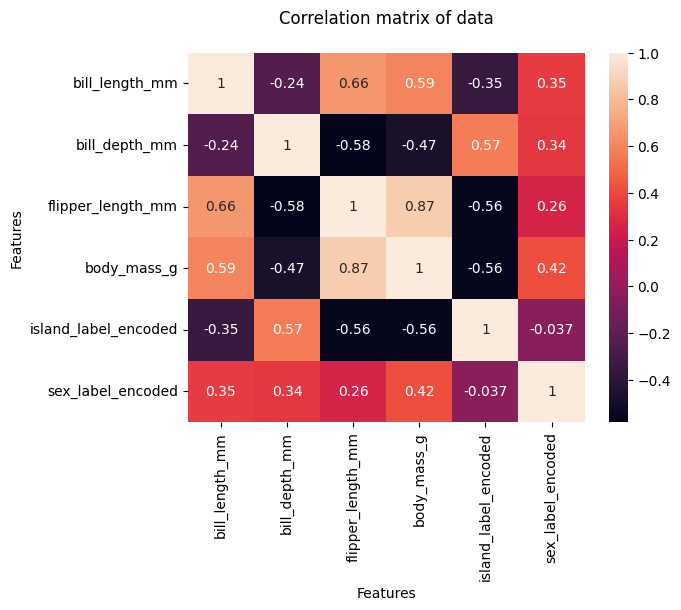

In [ ]:
# Heatmap of correlation matrix
features = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'island_label_encoded', 'sex_label_encoded']
corelation = penguin_data_frame[features].corr()
heatmap = sns.heatmap(corelation, annot = True)
heatmap.set(xlabel='Features', ylabel='Features', title = "Correlation matrix of data\n")
plt.show()

## Supervised Learning (KNN)

In [ ]:
# Normalization of the features bill_length_mm,bill_depth_mm,flipper_length_mm, body_mass_g
from sklearn.preprocessing import StandardScaler

for column in penguin_data_frame[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]:
  penguin_data_frame[column] = StandardScaler().fit_transform(penguin_data_frame[[column]])

In [ ]:
# Splitting the dataset into test and train data
features = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'island_label_encoded', 'sex_label_encoded']
# since these are the features, we take them as x
x_feature = penguin_data_frame[features]
# since species is the output or label we'll take it as y
y_label = penguin_data_frame['species_label_encoded']
x_train, x_test, y_train, y_test = train_test_split(x_feature, y_label, test_size = 0.2, train_size = 0.8,
                                                    random_state = 42, shuffle=True,
                                                    stratify = y_label)
print("\nShape of x_train:\n{}".format(x_train.shape))
print("\nShape of x_test:\n{}".format(x_test.shape))
print("\nShape of y_train:\n{}".format(y_train.shape))
print("\nShape of y_test:\n{}".format(y_test.shape))


Shape of x_train:
(275, 6)

Shape of x_test:
(69, 6)

Shape of y_train:
(275,)

Shape of y_test:
(69,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(x_train, y_train)
y_prediction_KNN = model_KNN.predict(x_test)

report = pd.DataFrame()
report['Actual values'] = y_test
report['Predicted values KNN'] = y_prediction_KNN
print(report)

from sklearn.metrics import accuracy_score
print("\n\nAccuracy: ", accuracy_score(y_test, y_prediction_KNN))


     Actual values  Predicted values KNN
151              0                     0
1                0                     0
294              2                     2
337              2                     2
158              1                     1
..             ...                   ...
164              1                     1
236              2                     2
52               0                     0
121              0                     0
317              2                     2

[69 rows x 2 columns]


Accuracy:  0.9855072463768116


## Optimization

In [ ]:
# K-fold cross validation
from sklearn.model_selection import cross_val_score
Scores_KNN = cross_val_score(model_KNN, x_feature, y_label, cv = 10, scoring = 'accuracy')
print(Scores_KNN)
print("\nMean score of KNN: ", Scores_KNN.mean())

[1.         1.         0.97142857 1.         1.         1.
 1.         1.         1.         0.97058824]

Mean score of KNN:  0.9942016806722689


In [ ]:
# Ckecking which value of k is more suitable
k_range = range(1, 10)
k_scores = []

for k in k_range:
  model_knn = KNeighborsClassifier(n_neighbors=k)
  Scores_KNN = cross_val_score(model_KNN, x_feature, y_label, cv = 10, scoring = 'accuracy')
  k_scores.append(Scores_KNN.mean())

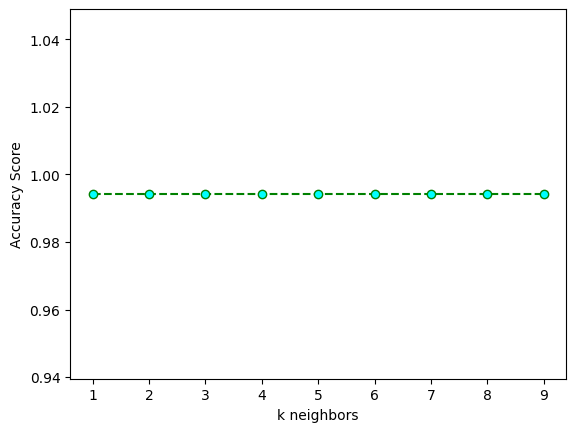

In [ ]:
# lineplot of n_neighbors value
# sns.lineplot(x = k_range, y = k_scores)
plt.plot(k_range, k_scores, color = 'green', marker='o',linestyle='dashed',markerfacecolor='cyan')
plt.xlabel("k neighbors")
plt.ylabel("Accuracy Score")
plt.show()

In [ ]:
# Classification Report of KNN
from sklearn.metrics import classification_report
print("Classification Report of KNN: ")
print(classification_report(y_test, y_prediction_KNN))

Classification Report of KNN: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



In [ ]:
# Hyperparameter Optimization
# It is done for the K value
error = []
#Calculating error forKvalues between 1 and 60
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

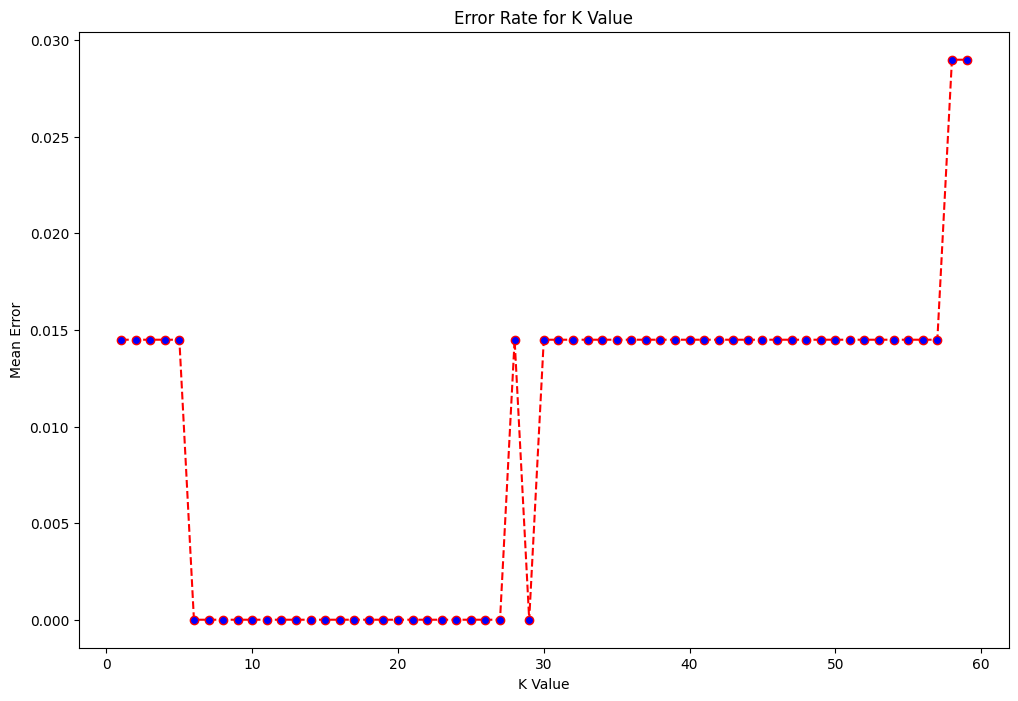

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(range(1,60), error, color ='red',linestyle = 'dashed', marker ='o',
         markerfacecolor ='blue',markersize = 6)
plt.title('Error Rate for K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

## **Supervised Learning (Naive Bias)**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Separate the features from the target
X = penguin_data_frame[['island_label_encoded', 'sex_label_encoded', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguin_data_frame['species_label_encoded']

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define and train the model
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8695652173913043
